In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns
import sqlalchemy, db_utils, glob, os, requests, itertools, re
from sklearn.metrics import roc_curve, auc, average_precision_score, roc_auc_score, precision_recall_curve, accuracy_score
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from statannotations.Annotator import Annotator
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("colorblind")
global_fontsize = 12
figsize = (3,3)
legend_fontsize = 8
bbox_to_anchor =(1.0, 1.0)
connect = db_utils.get_connection()
save_path= '/Volumes/imb-luckgr/imb-luckgr2/projects/AlphaFold/de_novo_predictions/Plots/AF_de_novo/'

In [2]:
query = """select AF_outcome, count(*) as count from chopyan_db.NDD_NDD_PPI_AF_results
group by AF_outcome;"""
df = pd.read_sql_query(query,con=connect)
df.replace({None:"No prediction performed","no prediction":"No result obtained",
            "false positive":"Wrong","likely wrong":"Likely wrong","potential de novo":"Likely correct",
           "questionable":"Questionable","true positive":"Correct"},inplace=True)
df

,AF_outcome,count
0,No prediction performed,5
1,Wrong,3
2,Likely wrong,14
3,No result obtained,11
4,Likely correct,12
5,Questionable,16
6,Correct,6


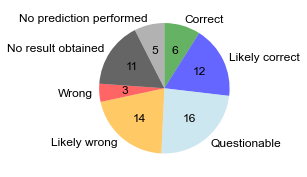

In [3]:
# plot the piechart to show the count in every AF_outcome
temp = df.copy()

data_dict = {index:values for index,values in zip(temp['AF_outcome'],temp['count'])}

outcome_order = ["Correct","Likely correct","Questionable","Likely wrong","Wrong","No result obtained",
                "No prediction performed"]

#define Seaborn color palette to use
colors = dict(zip(outcome_order,["green","blue","lightblue","orange","red","black","grey"]))

#create pie chart
fig, ax = plt.subplots(figsize=figsize)

ax.pie([data_dict[value] for value in outcome_order], labels=outcome_order,
                       colors=[colors.get(outcome) for outcome in outcome_order],autopct=lambda x: f'{int((x*sum(data_dict.values())/100.0)+0.5)}',
                       textprops={'fontsize': global_fontsize},counterclock=False,startangle=90,
                      wedgeprops={"alpha":0.6})


plt.savefig(f'{save_path}AF_outcome_piechart.pdf',
           bbox_inches='tight',transparent=True)
plt.savefig(f'{save_path}AF_outcomepiechart.jpeg',dpi=300,
           bbox_inches='tight',transparent=True)
plt.show()